In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [4]:
data = pd.read_csv("/content/sample_data/Rainfall.csv")

In [28]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,80.0
1,1022.0,15.6,81,83,1,0.6,50.0,50.0
2,1019.7,18.4,95,91,1,0.0,40.0,40.0
3,1018.9,18.8,90,88,1,1.0,50.0,50.0
4,1015.9,19.9,95,81,1,0.0,40.0,40.0


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
data.shape

(366, 12)

In [8]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
print('Data info:')
data.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [11]:
data.columns = data.columns.str.strip()

In [12]:
data = data.drop(columns=['day'])

In [13]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [14]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['winddirection'].fillna(data['windspeed'].median())

In [15]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
data['rainfall'] = data['rainfall'].map({"yes": 1,"no": 0})

In [17]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,101.284153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,81.722827
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,10.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,40.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,70.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,190.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,350.000000


In [18]:
sns.set(style='whitegrid')

In [19]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

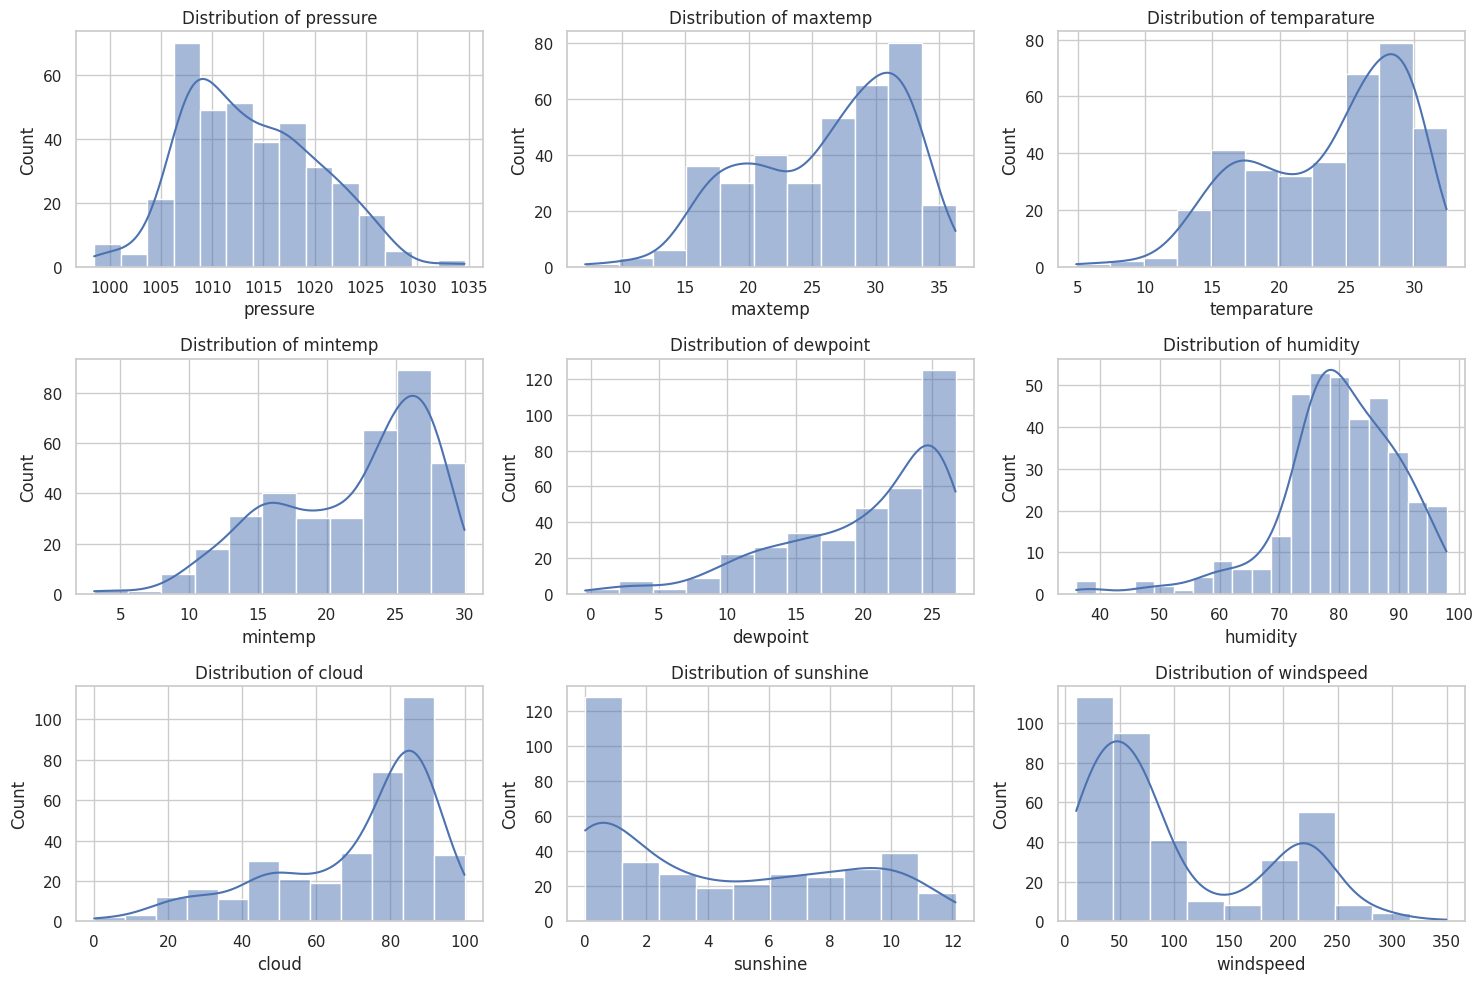

In [22]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


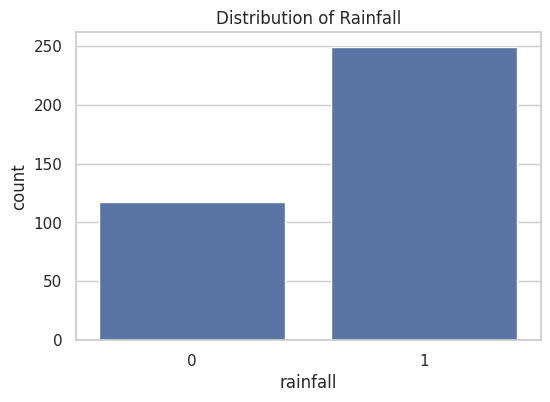

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=data)
plt.title("Distribution of Rainfall")
plt.show()

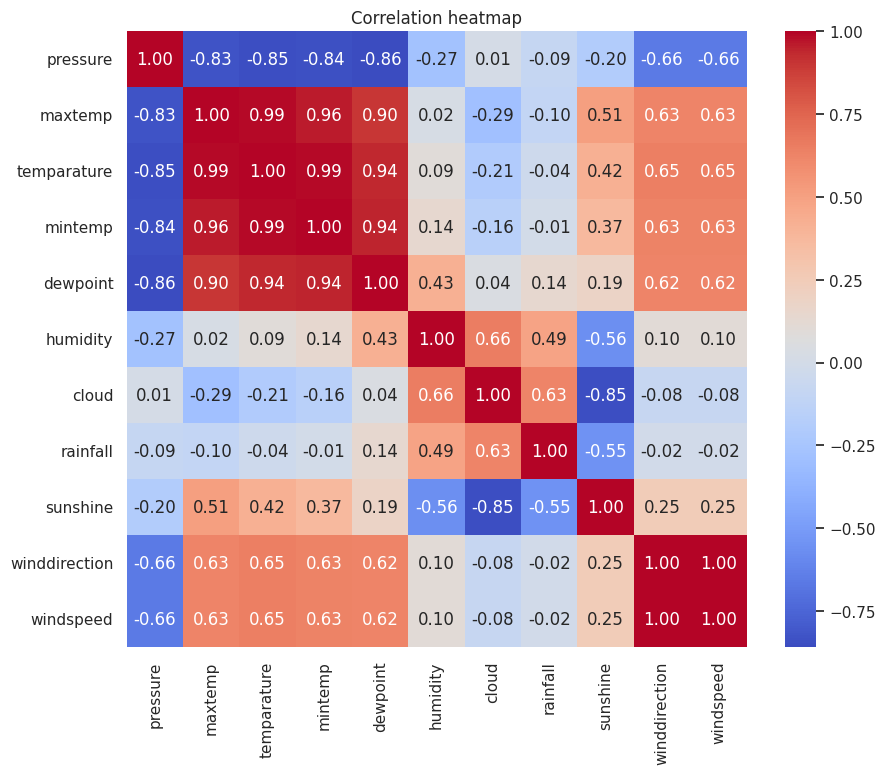

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

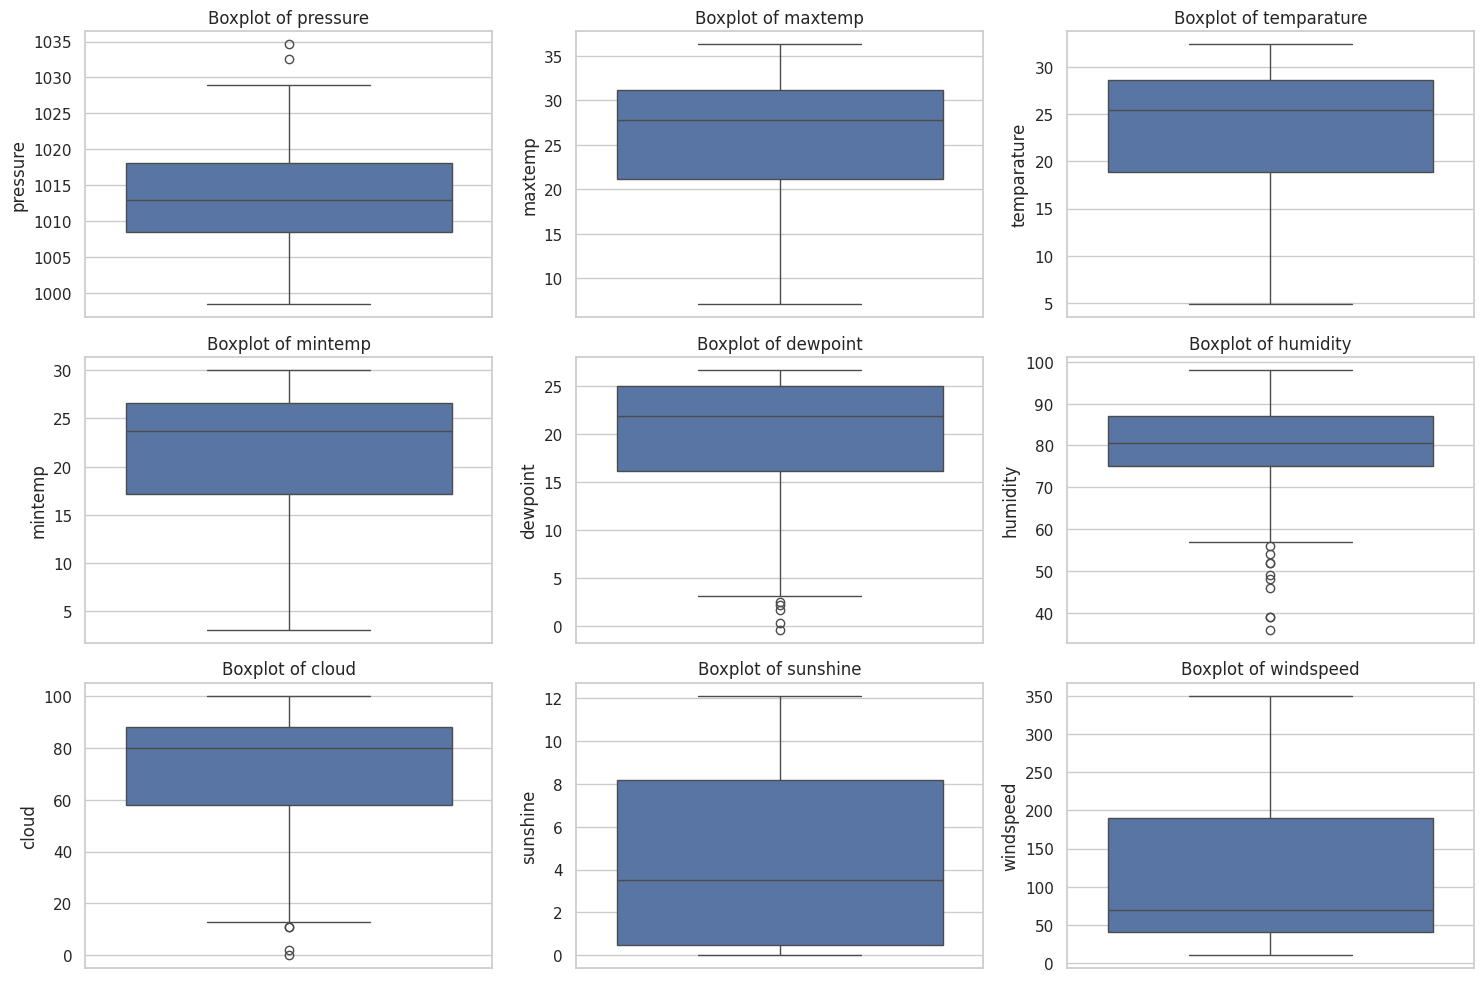

In [26]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [27]:
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [29]:
print(data['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [30]:
df_majority = data[data['rainfall'] == 1]
df_minority = data[data['rainfall'] == 0]

In [31]:
print(df_majority)
print(df_minority)

     pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  \
0      1025.9      13.1        72     49         1       9.3           80.0   
1      1022.0      15.6        81     83         1       0.6           50.0   
2      1019.7      18.4        95     91         1       0.0           40.0   
3      1018.9      18.8        90     88         1       1.0           50.0   
4      1015.9      19.9        95     81         1       0.0           40.0   
..        ...       ...       ...    ...       ...       ...            ...   
359    1020.4      13.5        75     89         1       0.7           10.0   
361    1022.7      15.0        84     90         1       0.0           30.0   
362    1026.6      12.8        75     85         1       1.0           20.0   
363    1025.9      13.3        75     78         1       4.6           70.0   
364    1025.3      13.3        78     86         1       1.2           20.0   

     windspeed  
0         80.0  
1         50.0  


In [32]:
df_majority_downsampled = resample(df_majority, replace = False, n_samples=len(df_minority), random_state=42)

In [33]:
df_majority_downsampled.shape

(117, 8)

In [34]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [35]:
df_downsampled.shape

(234, 8)

In [36]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,270.0
9,1017.5,15.5,85,91,1,0.0,70.0,70.0
137,1012.3,20.1,80,86,1,0.3,80.0,80.0
89,1018.3,16.3,79,89,1,2.4,40.0,40.0
157,1008.8,24.7,91,80,1,2.2,20.0,20.0


In [37]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,30.0
1,1013.4,19.5,69,17,0,10.5,70.0,70.0
2,1006.1,24.4,74,27,0,10.8,220.0,220.0
3,1007.6,24.8,85,84,1,1.8,70.0,70.0
4,1021.2,8.4,66,18,0,10.1,20.0,20.0


In [40]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [41]:
X = df_downsampled.drop(columns=['rainfall'])
Y = df_downsampled['rainfall']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=42)

In [45]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ["sqrt", "log2"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [47]:
best_rf_model = grid_search_rf.best_estimator_

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [48]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation scores: ', np.mean(cv_scores))

Cross-validation scores:  [0.65789474 0.84210526 0.83783784 0.81081081 0.91891892]
Mean cross-validation scores:  0.8135135135135135


In [50]:
y_pred = best_rf_model.predict(X_test)

print('Test set Accuracy:', accuracy_score(Y_test,y_pred))
print('Test set Confusion Matrix: \n',confusion_matrix(Y_test, y_pred))
print('Classification Reports: \n', classification_report(Y_test, y_pred))

Test set Accuracy: 0.7021276595744681
Test set Confusion Matrix: 
 [[15  9]
 [ 5 18]]
Classification Reports: 
               precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.67      0.78      0.72        23

    accuracy                           0.70        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.71      0.70      0.70        47



In [51]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [54]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print('Prediction result: ', "Rainfall" if  prediction[0] == 1 else "No rainfall")

Prediction result:  Rainfall


In [55]:
model_data = {'model': best_rf_model, 'feature_names':X.columns.tolist()}

with open('rainfall_prediction_model.pkl','wb') as file:
  pickle.dump(model_data, file)

In [56]:
model = model_data['model']
feature_names = model_data['feature_names']

In [58]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

prediction = best_rf_model.predict(input_df)
print('Prediction result: ', "Rainfall" if  prediction[0] == 1 else "No rainfall")

Prediction result:  Rainfall
